# Technical Report: COVID-19 Data Analysis

## Abstract
This report presents the steps taken to analyze COVID-19 data, including data preparation, exploratory data analysis, model development, and evaluation.
## Introduction
In this report, I aim to analyze COVID-19 data to identify trends, develop predictive models, and provide actionable insights to aid in decision-making.
## Objectives
- **Primary Objective**: Forecast the number of confirmed COVID-19 cases.
- **Secondary Objectives**: Understand the key drivers of the spread, evaluate different models, and recommend strategies.
# Data Source: The data was obtained from 
'https://www.kaggle.com/datasets/imdevskp/corona-virus-report'

# Data Preparation and Cleaning 

In [27]:
import seaborn as sns 
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [28]:
df = pd.read_csv(r"C:\Users\akino_fdm8\OneDrive\Documents\3mtt\data sets\archive\covid_19_clean_complete.csv")
df['Province/State'].isnull().sum()
df['Province/State'] = df['Province/State'].fillna('Unknown')
df.isnull().sum()
df.drop_duplicates(inplace=True)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
country_mapping = {
    "USA": "United States",
    "United States of America": "United States",
    "U.S.A.": "United States",
    'US':'United States',
    'UK':'United Kingdom',
    'UAE':'United Arab Emirates',
    'S. Korea':'South Korea',
    'DRC':'Democratic Republic of the Congo',
    'CAR':'Central African Republic'


}

df['Country/Region'] = df['Country/Region'].replace(country_mapping)

In [29]:
df['D/Confirmed_Growth_Rate'] = df.groupby('Country/Region')['Confirmed'].pct_change() * 100

In [30]:
df['D/Confirmed_Growth_Rate'] = df['D/Confirmed_Growth_Rate'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [32]:
print(np.isinf(df['D/Confirmed_Growth_Rate']).sum())
print(df['D/Confirmed_Growth_Rate'].isnull().sum())

0
0


In [34]:
df['Mortality_Ratio'] = (df['Deaths'] / df['Confirmed']) * 100

In [39]:
df['Mortality_Ratio'] = df['Mortality_Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)
df.isnull().sum()

Province/State             0
Country/Region             0
Lat                        0
Long                       0
Date                       0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
WHO Region                 0
D/Confirmed_Growth_Rate    0
Mortality_Ratio            0
dtype: int64

In [41]:
dfp=pd.read_csv(r"C:\Users\akino_fdm8\OneDrive\Documents\3mtt\data sets\archive\worldometer_data.csv")

In [43]:
country_mapping = {
    "USA": "United States",
    "United States of America": "United States",
    "U.S.A.": "United States",
    'US':'United States',
    'UK':'United Kingdom',
    'UAE':'United Arab Emirates',
    'S. Korea':'South Korea',
    'DRC':'Democratic Republic of the Congo',
    'CAR':'Central African Republic'


}

dfp['Country/Region'] = dfp['Country/Region'].replace(country_mapping)

In [45]:
dfp = dfp[['Country/Region','Population']]

In [47]:
df= pd.merge(df, dfp, on='Country/Region', how='left')

In [49]:
df.head(20)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,D/Confirmed_Growth_Rate,Mortality_Ratio,Population
0,Unknown,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0.0,0.0,39009447.0
1,Unknown,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,0.0,0.0,2877470.0
2,Unknown,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,0.0,0.0,43926079.0
3,Unknown,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,0.0,0.0,77278.0
4,Unknown,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,0.0,0.0,32956300.0
5,Unknown,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0,0,0,Americas,0.0,0.0,98010.0
6,Unknown,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0,0,Americas,0.0,0.0,45236884.0
7,Unknown,Armenia,40.069100,45.038200,2020-01-22,0,0,0,0,Europe,0.0,0.0,2963811.0
8,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0,0,0,0,Western Pacific,0.0,0.0,25528864.0
9,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0,0,0,0,Western Pacific,0.0,0.0,25528864.0


In [51]:
df['Population']=df['Population'].fillna(0)

In [53]:
df['Population'].isnull().sum()

0

In [55]:
df['Cases_per_100k'] = (df['Confirmed'] / df['Population']) * 100000

In [57]:
df['Cases_per_100k'] = df['Cases_per_100k'].replace([np.inf, -np.inf], np.nan).fillna(0)
df['Cases_per_100k'].isnull().sum()

0

In [59]:
# Recovery Ratios
df['Recovery_Ratio'] = (df['Recovered'] / df['Confirmed']) * 100

# Active Cases Ratio
df['Active_Ratio'] = (df['Active'] / df['Confirmed']) * 100
df[['Recovery_Ratio', 'Active_Ratio']]=df[['Recovery_Ratio', 'Active_Ratio']].fillna(0)

In [61]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region',
       'D/Confirmed_Growth_Rate', 'Mortality_Ratio', 'Population',
       'Cases_per_100k', 'Recovery_Ratio', 'Active_Ratio'],
      dtype='object')

In [63]:
# Time-based Features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [65]:
df.isnull().sum()


Province/State             0
Country/Region             0
Lat                        0
Long                       0
Date                       0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
WHO Region                 0
D/Confirmed_Growth_Rate    0
Mortality_Ratio            0
Population                 0
Cases_per_100k             0
Recovery_Ratio             0
Active_Ratio               0
Year                       0
Month                      0
dtype: int64

In [67]:
df.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,D/Confirmed_Growth_Rate,Mortality_Ratio,Population,Cases_per_100k,Recovery_Ratio,Active_Ratio,Year,Month
count,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04,4.906800e+04,49068.000000,4.906800e+04,49068.000000,49068.000000,49068.000000,49068.0,49068.000000
mean,21.433730,23.528236,2020-04-24 12:00:00,1.688490e+04,884.179160,7.915713e+03,8.085012e+03,6.559197e+03,2.225505,3.100537e+07,59.787425,37.786824,39.487548,2020.0,4.281915
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01,-1.000000e+02,0.000000,0.000000e+00,0.000000,0.000000,-3.571429,2020.0,1.000000
25%,7.873054,-15.310100,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,6.280740e+05,0.000000,0.000000,0.000000,2020.0,3.000000
50%,23.634500,21.745300,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01,6.899883e-02,0.708630,9.449001e+06,0.298872,25.000000,28.540905,2020.0,4.000000
75%,41.204380,80.771797,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02,5.598020e+00,2.895710,3.777502e+07,19.966911,77.922078,80.112129,2020.0,6.000000
max,71.706900,178.065000,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,2.619291e+06,100.000000,1.381345e+09,3903.298128,100.187091,100.000000,2020.0,7.000000
std,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04,1.054463e+05,4.071028,9.409992e+07,211.118995,38.559286,38.992937,0.0,1.810241


In [69]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Province/State           49068 non-null  object        
 1   Country/Region           49068 non-null  object        
 2   Lat                      49068 non-null  float64       
 3   Long                     49068 non-null  float64       
 4   Date                     49068 non-null  datetime64[ns]
 5   Confirmed                49068 non-null  int64         
 6   Deaths                   49068 non-null  int64         
 7   Recovered                49068 non-null  int64         
 8   Active                   49068 non-null  int64         
 9   WHO Region               49068 non-null  object        
 10  D/Confirmed_Growth_Rate  49068 non-null  float64       
 11  Mortality_Ratio          49068 non-null  float64       
 12  Population               49068 n

## Exploratory Data Analysis (EDA)

## Correlation Matrix
A correlation matrix was computed to understand the relationships between different variables in the dataset.

## Time Series of Confirmed Cases
A time series plot of confirmed COVID-19 cases was created to visualize the trend over time.

## Rolling Mean and Confirmed Cases Plot
The rolling mean of confirmed cases was plotted alongside the actual confirmed cases to observe the trend and smooth out short-term fluctuations.

## Time Series Decomposition
The time series was decomposed into trend, seasonality, and residual components and plotted to understand the underlying patterns in the data.

## Monthly Aggregated Data of Confirmed Cases
The confirmed cases were aggregated on a monthly basis and plotted to visualize the monthly trends and variations in the data.

## Scatter Plot of Confirmed Cases vs. Deaths
A scatter plot was created to analyze the relationship between confirmed cases and deaths.

## Time Series of Confirmed, Deaths, Recovered, and Active Cases
Time series plots of confirmed, deaths, recovered, and active cases were created to visualize the trends of these variables over time.

## Confirmed, Deaths, Recovered, and Active Cases by WHO Region
The confirmed cases, deaths, recovered, and active cases were analyzed and plotted by WHO region to understand the regional differences in the pandemic's impact.

## Scatter Plot of Recovery and Active Ratios
A scatter plot was created to examine the relationship between recovery and active ratios.

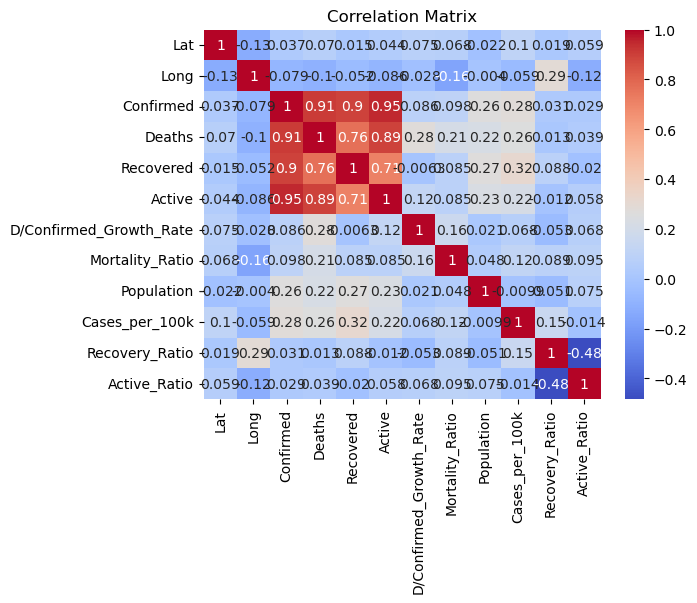

In [72]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Interpreting the Specific Correlations

### Confirmed vs. Deaths (0.91)
This high positive correlation indicates that regions with a higher number of confirmed cases also tend to have a higher number of deaths. This relationship is often expected since more confirmed cases generally mean more severe outcomes, including deaths.

### Deaths vs. Recovered (0.76)
This positive correlation shows that areas with higher death counts also have higher recovery numbers. This might seem counterintuitive but could be due to the fact that regions with more severe outbreaks have both higher death and recovery totals.

### Confirmed Growth Rate vs. Active Cases (0.86)
This strong positive correlation suggests that regions experiencing faster growth in confirmed cases also tend to have more active cases. This indicates ongoing outbreaks and high transmission rates in those areas.

### Mortality Ratio vs. Total Population (0.05)
This very low positive correlation suggests a weak relationship between the mortality ratio and the total population size. This means that population size alone does not significantly impact the mortality ratio.

### Recovery Ratio vs. Active Ratio (-0.48)
This negative correlation indicates that as the Recovery Ratio increases, the Active Ratio tends to decrease. In other words, regions with higher recovery rates generally have a lower proportion of active cases relative to confirmed cases.


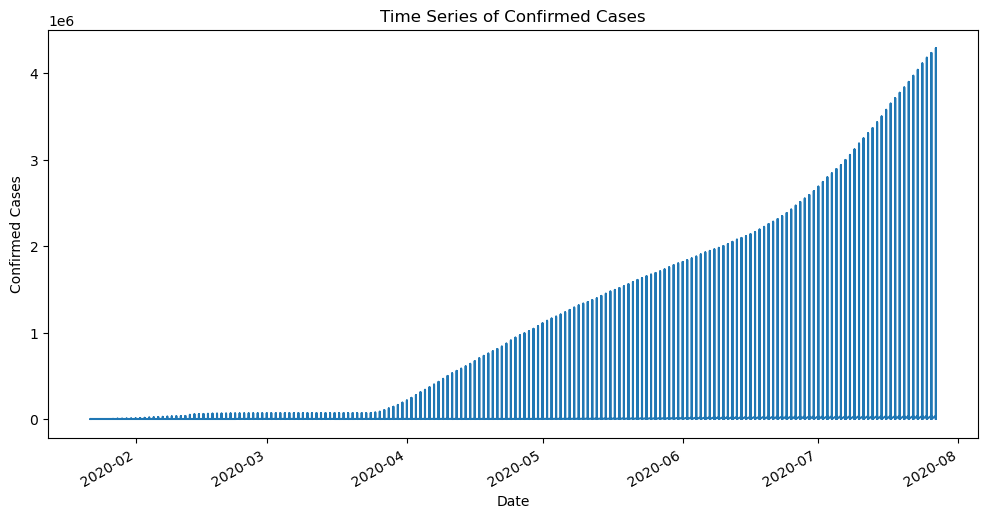

In [74]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plotting the time series for 'Confirmed' cases
df['Confirmed'].plot(figsize=(12, 6))
plt.title('Time Series of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

# Time Series of Confirmed Cases

This plot represents the time series of confirmed cases over a period from early 2020 to mid-2020. The x-axis shows the timeline, starting from February 2020 to August 2020, while the y-axis represents the number of confirmed cases, scaled in millions (1e6).

## Key Features:
- **X-axis (Time):** The dates range from February 2020 to August 2020.
- **Y-axis (Confirmed Cases):** The number of confirmed cases, scaled in millions.
- **Trend:** The plot shows a significant increase in the number of confirmed cases over time, with a noticeable exponential growth starting around April 2020 and continuing to rise steeply through August 2020.

## Relevance:
This plot is particularly relevant for understanding the progression of a pandemic or an outbreak over time. It highlights the rapid increase in confirmed cases, which can be crucial for public health planning, resource allocation, and implementing control measures.


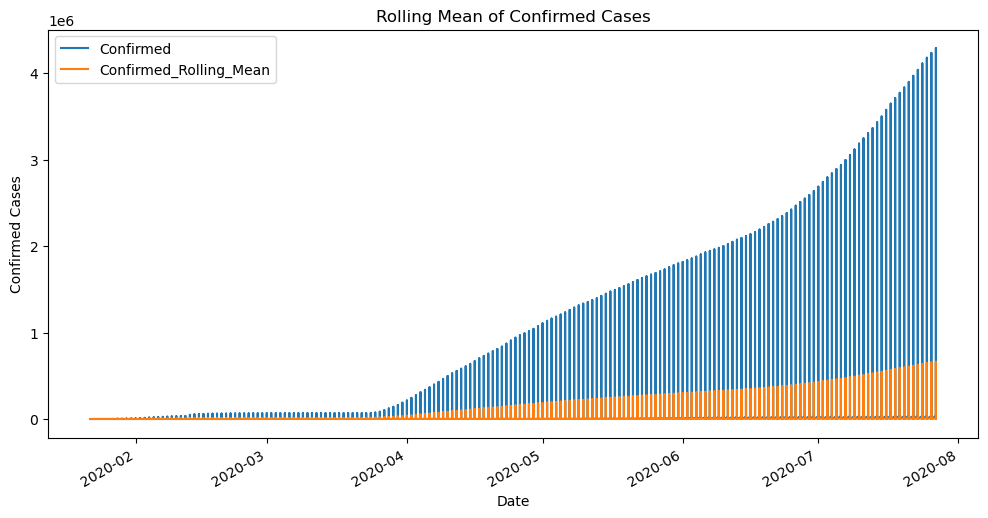

In [77]:
# Rolling mean for 'Confirmed' cases
df['Confirmed_Rolling_Mean'] = df['Confirmed'].rolling(window=7).mean()

# Plotting the rolling mean
df[['Confirmed', 'Confirmed_Rolling_Mean']].plot(figsize=(12, 6))
plt.title('Rolling Mean of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

# Rolling Mean of Confirmed Cases

This plot represents the rolling mean of confirmed cases over time, providing a smoothed trend of the number of cases. The x-axis shows the timeline from February 2020 to August 2020, and the y-axis represents the number of confirmed cases, scaled in millions (1e6).

## Key Features:
- **X-axis (Time):** Dates ranging from February 2020 to August 2020.
- **Y-axis (Confirmed Cases):** Number of confirmed cases, scaled in millions.
- **Lines:**
  - **Confirmed (Blue Line):** Shows the cumulative number of confirmed cases over time.
  - **Confirmed Rolling Mean (Orange Line):** Represents the rolling mean of confirmed cases over the same period.

## Relevance:
This plot is significant for understanding the overall trend and growth of confirmed cases while smoothing out short-term fluctuations. The rolling mean helps to highlight the underlying trend in the data, making it easier to observe long-term patterns and changes.


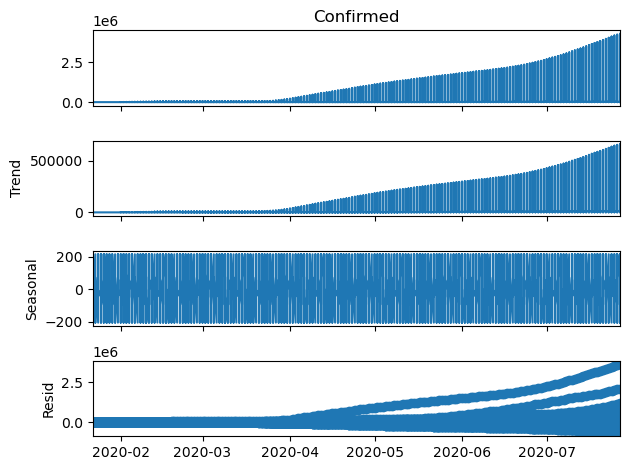

In [80]:
# Decompose the time series
decomposition = seasonal_decompose(df['Confirmed'], model='additive', period=7)
seasonal = decomposition.seasonal

# Plot the decomposed components
decomposition.plot()
plt.show()

# Time Series Decomposition of Confirmed Cases

This plot represents the decomposition of the time series of confirmed cases into its component parts: observed, trend, seasonal, and residual. The decomposition helps to understand the underlying patterns in the data.

## Key Components:
1. **Observed (Confirmed Cases)**: This plot shows the total number of confirmed cases over time, exhibiting an exponential increase from February 2020 to July 2020.
2. **Trend**: This plot represents the overall trend in the number of confirmed cases, showing a consistent upward trajectory.
3. **Seasonal**: This plot illustrates the seasonal component, which oscillates around zero, indicating periodic fluctuations in the data.
4. **Residual**: This plot captures the noise or irregularities in the data, showing the residuals after removing the trend and seasonal components.

## Relevance:
- **Observed**: Provides a visual of the actual data over time.
- **Trend**: Helps to understand the long-term direction of the data.
- **Seasonal**: Highlights recurring patterns or cycles in the data.
- **Residual**: Identifies any anomalies or irregular patterns not captured by the trend and seasonal components.

Understanding these components is crucial for accurate forecasting and identifying key patterns in the data.


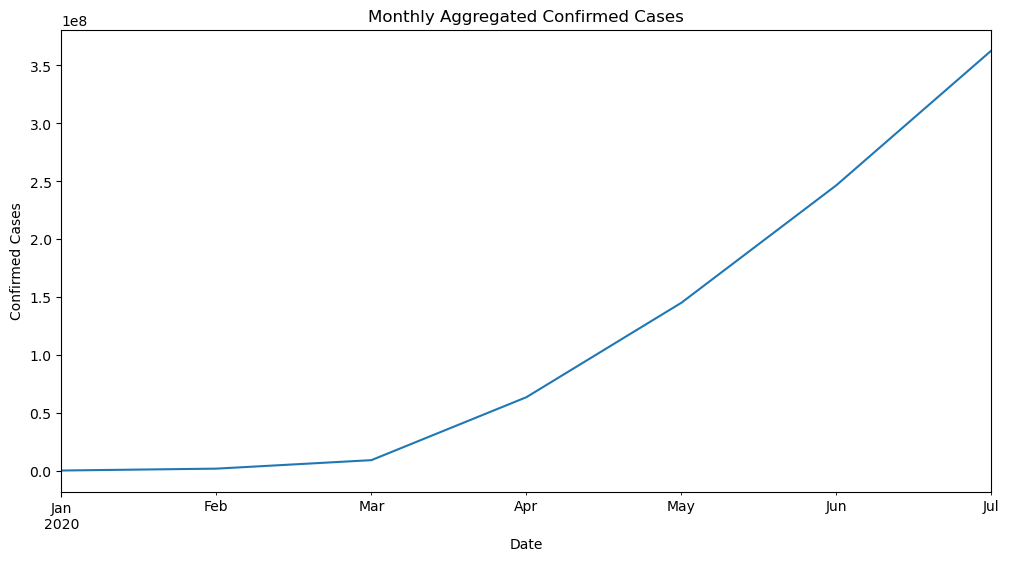

In [83]:
# Resample the data to monthly frequency
df_monthly = df['Confirmed'].resample('ME').sum()

# Plotting the monthly aggregated data
df_monthly.plot(figsize=(12, 6))
plt.title('Monthly Aggregated Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

# Monthly Aggregated Confirmed Cases

This plot represents the monthly aggregated confirmed cases from January 2020 to July 2020. The x-axis shows the timeline, starting from January 2020 to July 2020, while the y-axis represents the number of confirmed cases, scaled up to 350 million (3.5e8).

## Key Features:
- **X-axis (Date):** The dates range from January 2020 to July 2020.
- **Y-axis (Confirmed Cases):** The number of confirmed cases, scaled up to 350 million.
- **Trend:** The plot shows a steady increase in confirmed cases over time, with a significant rise starting in March 2020 and continuing to increase sharply through July 2020.

## Relevance:
This visualization is crucial for understanding the exponential growth of confirmed cases over the first half of 2020, likely related to a significant health event such as a pandemic. It highlights the rapid increase in cases, which can inform public health decisions, resource allocation, and containment strategies.


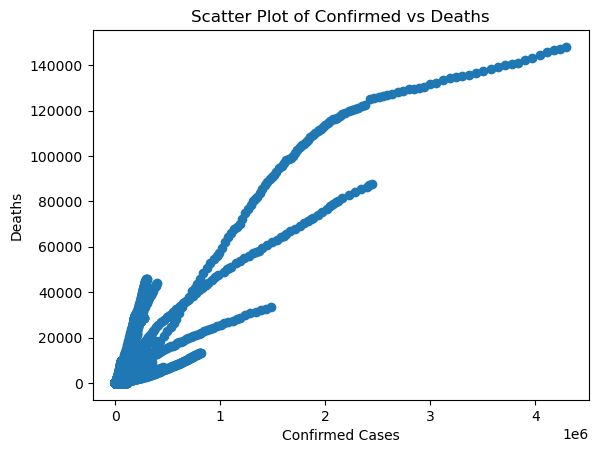

In [85]:
# Scatter plot to compare 'Confirmed' vs 'Deaths'
plt.scatter(df['Confirmed'], df['Deaths'])
plt.title('Scatter Plot of Confirmed vs Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.show()

# Scatter Plot of Confirmed Cases vs. Deaths

This scatter plot represents the relationship between the number of confirmed cases and the number of deaths. The x-axis shows the number of confirmed cases, ranging from 0 to 4,000,000 (4e6), while the y-axis shows the number of deaths, ranging from 0 to 140,000.

## Key Features:
- **X-axis (Confirmed Cases):** The number of confirmed cases, ranging up to 4 million.
- **Y-axis (Deaths):** The number of deaths, ranging up to 140,000.
- **Curves:** The plot shows multiple curves starting from the origin (0,0) and diverging as the number of confirmed cases increases, indicating a relationship between confirmed cases and deaths.

## Relevance:
This plot is crucial for understanding the correlation between the number of confirmed cases and the resulting deaths. It visually represents how the increase in confirmed cases is associated with the increase in deaths, highlighting the severity and impact of the disease. This information is vital for public health planning and response strategies.


In [92]:
features = ['Confirmed', 'Deaths', 'Recovered', 'Active']

for feature in features:
    df[f'{feature}_flag'] = df[feature].apply(lambda x: 1 if x == 0 else 0)

***Features*** creates new binary flag columns for each feature ('Confirmed', 'Deaths', 'Recovered', 'Active'). Each flag column indicates whether the value of the corresponding feature is zero (1) or non-zero (0). This process helps in identifying and flagging rows with zero values for further analysis.


In [65]:
df

,Province/State,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region,D/Confirmed_Growth_Rate,...,Cases_per_100k,Recovery_Ratio,Active_Ratio,Year,Month,Confirmed_Rolling_Mean,Confirmed_flag,Deaths_flag,Recovered_flag,Active_flag
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,Unknown,Afghanistan,33.939110,67.709953,0,0,0,0,Eastern Mediterranean,0.000000,...,0.000000,0.000000,0.000000,2020,1,NaN,1,1,1,1
2020-01-22,Unknown,Albania,41.153300,20.168300,0,0,0,0,Europe,0.000000,...,0.000000,0.000000,0.000000,2020,1,NaN,1,1,1,1
2020-01-22,Unknown,Algeria,28.033900,1.659600,0,0,0,0,Africa,0.000000,...,0.000000,0.000000,0.000000,2020,1,NaN,1,1,1,1
2020-01-22,Unknown,Andorra,42.506300,1.521800,0,0,0,0,Europe,0.000000,...,0.000000,0.000000,0.000000,2020,1,NaN,1,1,1,1
2020-01-22,Unknown,Angola,-11.202700,17.873900,0,0,0,0,Africa,0.000000,...,0.000000,0.000000,0.000000,2020,1,NaN,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,Unknown,Sao Tome and Principe,0.186400,6.613100,865,14,734,117,Africa,0.231750,...,393.998470,84.855491,13.526012,2020,7,1234.857143,0,0,0,0
2020-07-27,Unknown,Yemen,15.552727,48.516388,1691,483,833,375,Eastern Mediterranean,0.594884,...,5.657998,49.260792,22.176227,2020,7,1221.714286,0,0,0,0
2020-07-27,Unknown,Comoros,-11.645500,43.333300,354,7,328,19,Africa,0.000000,...,40.627733,92.655367,5.367232,2020,7,748.857143,0,0,0,0


In [96]:
zero_counts = df[[f'{feature}_flag' for feature in features]].mean() * 100
print(zero_counts)

Confirmed_flag    20.500122
Deaths_flag       41.100106
Recovered_flag    33.950844
Active_flag       28.839570
dtype: float64


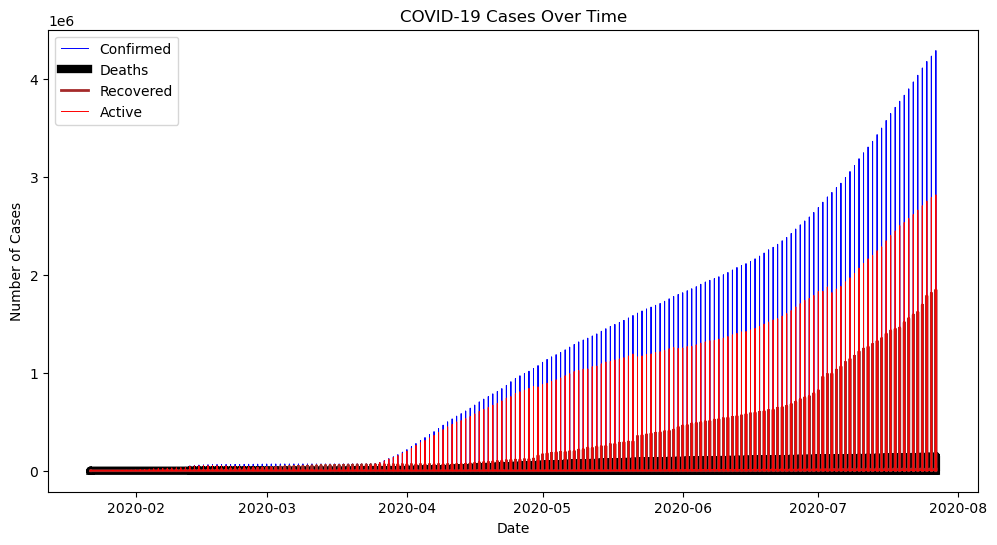

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Confirmed'], label='Confirmed', color='blue',linewidth=0.7)
plt.plot(df.index, df['Deaths'], label='Deaths', color='black', linewidth=6, linestyle='-')  # Dashed line for better visibility
plt.plot(df.index, df['Recovered'], label='Recovered', color='brown', linewidth=2,linestyle='-')
plt.plot(df.index, df['Active'], label='Active', color='red',linewidth=0.7)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Over Time')
plt.legend()
plt.show()


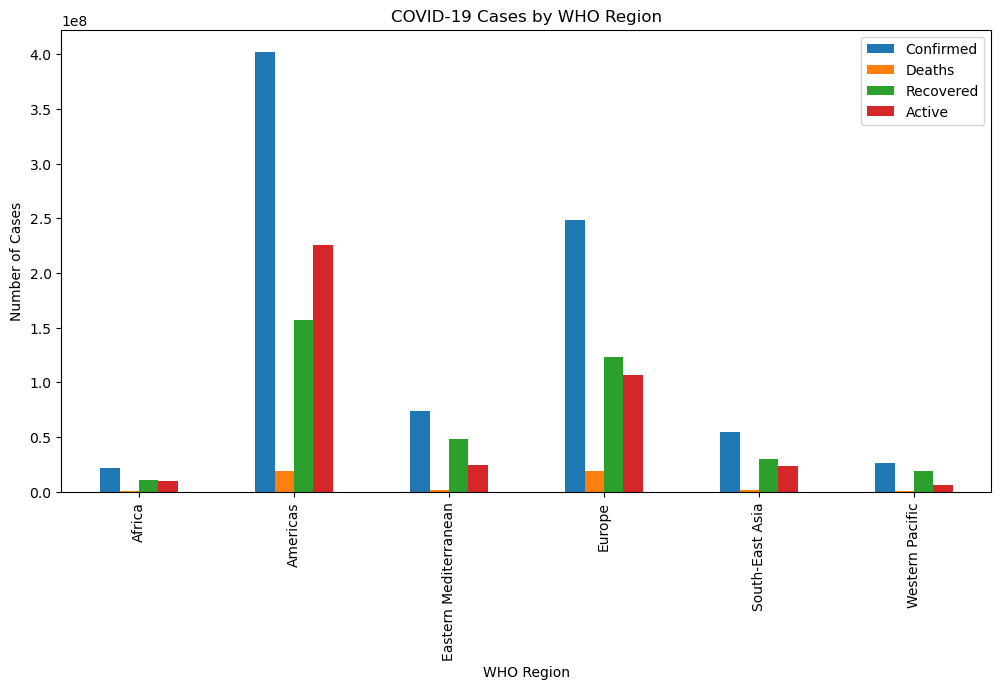

In [73]:
region_data = df.groupby('WHO Region').sum()
region_data[['Confirmed', 'Deaths', 'Recovered', 'Active']].plot(kind='bar', figsize=(12, 6))
plt.xlabel('WHO Region')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases by WHO Region')
plt.show()


# COVID-19 Cases by WHO Region

This plot is a bar chart that visualizes COVID-19 cases by WHO region. The x-axis represents different WHO regions, and the y-axis represents the number of cases in scientific notation (1e8, which means 100,000,000). The chart includes four categories of COVID-19 cases: Confirmed, Deaths, Recovered, and Active. Each category is represented by a different color:

- **Blue**: Confirmed cases
- **Orange**: Deaths
- **Green**: Recovered cases
- **Red**: Active cases

## Key Observations:

1. **Americas**:
   - The Americas have the highest number of confirmed cases, approaching 4.0e8 (400,000,000).
   - Deaths and recovered cases are also significantly high, with deaths being the second highest after confirmed cases.
   - Active cases are also notable but less than deaths and recovered cases.

2. **Europe**:
   - Europe has the second-highest number of confirmed cases, around 2.5e8 (250,000,000).
   - The number of deaths and recovered cases are also high, with recovered cases being slightly higher than deaths.
   - Active cases are significant but less than deaths and recovered cases.

3. **Eastern Mediterranean**:
   - This region has a moderate number of confirmed cases, around 0.5e8 (50,000,000).
   - Deaths, recovered, and active cases are relatively lower compared to the Americas and Europe.

4. **South-East Asia**:
   - South-East Asia has a moderate number of confirmed cases, slightly less than the Eastern Mediterranean.
   - Deaths, recovered, and active cases are also moderate.

5. **Africa**:
   - Africa has the lowest number of confirmed cases among the regions, with numbers significantly lower than other regions.
   - Deaths, recovered, and active cases are also very low.

6. **Western Pacific**:
   - The Western Pacific has a low number of confirmed cases, similar to Africa.
   - Deaths, recovered, and active cases are also low.

## Relevance:

This plot is relevant as it provides a clear visual comparison of the impact of COVID-19 across different WHO regions. It helps in understanding which regions are most affected and the distribution of different case categories (confirmed, deaths, recovered, and active). This information can be crucial for public health planning, resource allocation, and implementing targeted interventions to control the spread of the virus.


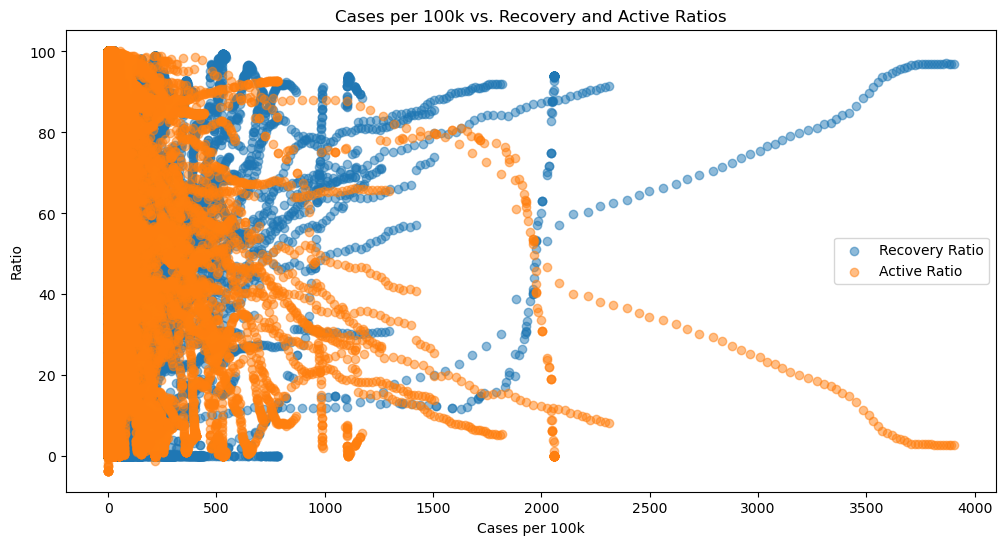

In [84]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Cases_per_100k'], df['Recovery_Ratio'], label='Recovery Ratio', alpha=0.5)
plt.scatter(df['Cases_per_100k'], df['Active_Ratio'], label='Active Ratio', alpha=0.5)
plt.xlabel('Cases per 100k')
plt.ylabel('Ratio')
plt.title('Cases per 100k vs. Recovery and Active Ratios')
plt.legend()
plt.show()

# Scatter Plot of Cases per 100k vs. Recovery and Active Ratios

This scatter plot visualizes the relationship between the number of cases per 100,000 population and the ratios of recovery and active cases. The x-axis represents the number of cases per 100k, ranging from 0 to 4000. The y-axis represents the ratio, ranging from 0 to 100. The plot includes two sets of data points:

- **Blue Dots (Recovery Ratio)**: Represent the recovery ratio.
- **Orange Dots (Active Ratio)**: Represent the active ratio.

## Key Observations:
1. **Recovery Ratio (Blue Dots)**:
   - The recovery ratio shows variability across different levels of cases per 100k.
   - Higher recovery ratios can be seen across a broad range of case densities, indicating effective recovery efforts in those regions.

2. **Active Ratio (Orange Dots)**:
   - The active ratio also varies with the number of cases per 100k.
   - Lower active ratios are observed in regions with higher recovery ratios, suggesting fewer ongoing active cases where recovery efforts are effective.

## Relevance:
This plot is relevant for understanding how the number of cases per 100k population relates to the status of recovery and active cases. It provides insights into the effectiveness of recovery efforts and ongoing active cases in different regions, which can help in assessing public health strategies and resource allocation.





# ARIMA Model for Forecasting Confirmed COVID-19 Cases

After completing the Exploratory Data Analysis (EDA), the next step involves developing a forecasting model to predict future confirmed COVID-19 cases. We will use the ARIMA (AutoRegressive Integrated Moving Average) model for this purpose.

## Model Selection: ARIMA

### 1. Introduction to ARIMA
The ARIMA model is a popular time series forecasting technique that combines three components:
- **AutoRegressive (AR) part**: Involves regressing the variable on its own lagged (prior) values.
- **Integrated (I) part**: Involves differencing the observations to make the time series stationary.
- **Moving Average (MA) part**: Involves modeling the error term as a linear combination of error terms occurring at various times in the past.

### 2. Data Preparation
- **Training and Test Split**: Split the dataset into training and test sets.
- **Stationarity Check**: Ensure the time series is stationary by checking the mean and variance over time.
- **Differencing**: Apply differencing to make the series stationary if required.

### 3. Hyperparameter Tuning
- **Order Selection (p, d, q)**: Use grid search to find the best combination of parameters that minimize the AIC (Akaike Information Criterion).

### 4. Model Fitting
- **Fit the ARIMA Model**: Train the model on the training data using the selected parameters.

### 5. Forecast Visualization
- **Plot the Forecast**: Visualize the forecasted confirmed cases alongside the actual cases.

### 6. Model Evaluation
- **Forecasting**: Generate forecasts for the test period.
- **Error Metrics**: Evaluate the model using metrics such as MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), and MAPE (Mean Absolute Percentage Error).


In [75]:
duplicates = df.index[df.index.duplicated()].unique()
print("Duplicate dates:", duplicates)

Duplicate dates: DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27'],
              dtype='datetime64[ns]', name='Date', length=188, freq=None)


In [77]:
df.head(40)

,Province/State,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region,D/Confirmed_Growth_Rate,...,Cases_per_100k,Recovery_Ratio,Active_Ratio,Year,Month,Confirmed_Rolling_Mean,Confirmed_flag,Deaths_flag,Recovered_flag,Active_flag
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,Unknown,Afghanistan,33.939110,67.709953,0,0,0,0,Eastern Mediterranean,0.0,...,0.0,0.0,0.0,2020,1,NaN,1,1,1,1
2020-01-22,Unknown,Albania,41.153300,20.168300,0,0,0,0,Europe,0.0,...,0.0,0.0,0.0,2020,1,NaN,1,1,1,1
2020-01-22,Unknown,Algeria,28.033900,1.659600,0,0,0,0,Africa,0.0,...,0.0,0.0,0.0,2020,1,NaN,1,1,1,1
2020-01-22,Unknown,Andorra,42.506300,1.521800,0,0,0,0,Europe,0.0,...,0.0,0.0,0.0,2020,1,NaN,1,1,1,1
2020-01-22,Unknown,Angola,-11.202700,17.873900,0,0,0,0,Africa,0.0,...,0.0,0.0,0.0,2020,1,NaN,1,1,1,1
2020-01-22,Unknown,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,Americas,0.0,...,0.0,0.0,0.0,2020,1,NaN,1,1,1,1
2020-01-22,Unknown,Argentina,-38.416100,-63.616700,0,0,0,0,Americas,0.0,...,0.0,0.0,0.0,2020,1,0.0,1,1,1,1
2020-01-22,Unknown,Armenia,40.069100,45.038200,0,0,0,0,Europe,0.0,...,0.0,0.0,0.0,2020,1,0.0,1,1,1,1
2020-01-22,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,Western Pacific,0.0,...,0.0,0.0,0.0,2020,1,0.0,1,1,1,1


In [89]:
df_aggregated = df.groupby('Date').sum()
df_aggregated = df_aggregated.asfreq('D')
df_aggregated['Confirmed_diff'] = df_aggregated['Confirmed'].diff().dropna()

1. **Aggregation by Date**:
   - The dataset is aggregated by date, summing up the values for each date. This provides a consolidated view of the data for each day, reducing duplicate entries and ensuring that all information for a specific date is combined into a single row.

2. **Daily Frequency**:
   - The dataset is resampled to have a daily frequency. This ensures a consistent timeline, with a data point for each day, even if some days originally had no data. Missing days are filled with appropriate placeholders.

3. **Difference Calculation**:
   - A new column, `Confirmed_diff`, is added to the dataset, representing the daily difference in confirmed cases. This column highlights the change in the number of confirmed cases from one day to the next, providing valuable information to improve model accuracy.

These transformations enhance the dataset by providing a clear and consistent temporal structure, enabling more accurate modeling of daily trends and changes in the confirmed cases.


In [95]:
# Fit ARIMA model on differenced data
model = ARIMA(df_aggregated['Confirmed_diff'].dropna(), order=(5, 1, 0))
model_fit = model.fit()

# Forecast on test data
test_pred_diff = model_fit.forecast(steps=len(test))
test_pred = df_aggregated['Confirmed'].iloc[train_size - 1] + test_pred_diff.cumsum()  # Revert differencing

# Calculate metrics
mape_test = mean_absolute_percentage_error(test['Confirmed'], test_pred)
mae_test = mean_absolute_error(test['Confirmed'], test_pred)
mse_test = mean_squared_error(test['Confirmed'], test_pred)
rmse_test = np.sqrt(mse_test)

# Print metrics
print(f'Test Mean Absolute Percentage Error (MAPE): {mape_test * 100:.2f}%')
print(f'Test Mean Absolute Error (MAE): {mae_test}')
print(f'Test Mean Squared Error (MSE): {mse_test}')
print(f'Test Root Mean Squared Error (RMSE): {rmse_test}')


Test Mean Absolute Percentage Error (MAPE): 9.95%
Test Mean Absolute Error (MAE): 1276885.812188424
Test Mean Squared Error (MSE): 1883487698317.8499
Test Root Mean Squared Error (RMSE): 1372402.1634775463


# Model Accuracy and Hyperparameter Tuning

The initial ARIMA model's accuracy was not satisfactory, as indicated by the error metrics:

- **Mean Absolute Percentage Error (MAPE)**: 9.95%
- **Mean Absolute Error (MAE)**: 1,276,885.81
- **Mean Squared Error (MSE)**: 1,838,487,698,317.85
- **Root Mean Squared Error (RMSE)**: 1,372,402.16

These values suggest that the model's predictions were not close enough to the actual values, necessitating further improvement. To enhance the model's performance, hyperparameter tuning was conducted. Hyperparameter tuning involves adjusting the parameters of the ARIMA model (p, d, q) to find the optimal combination that minimizes the error metrics and improves the forecasting accuracy. By refining these parameters, the model's ability to predict future confirmed cases more accurately can be significantly improved.


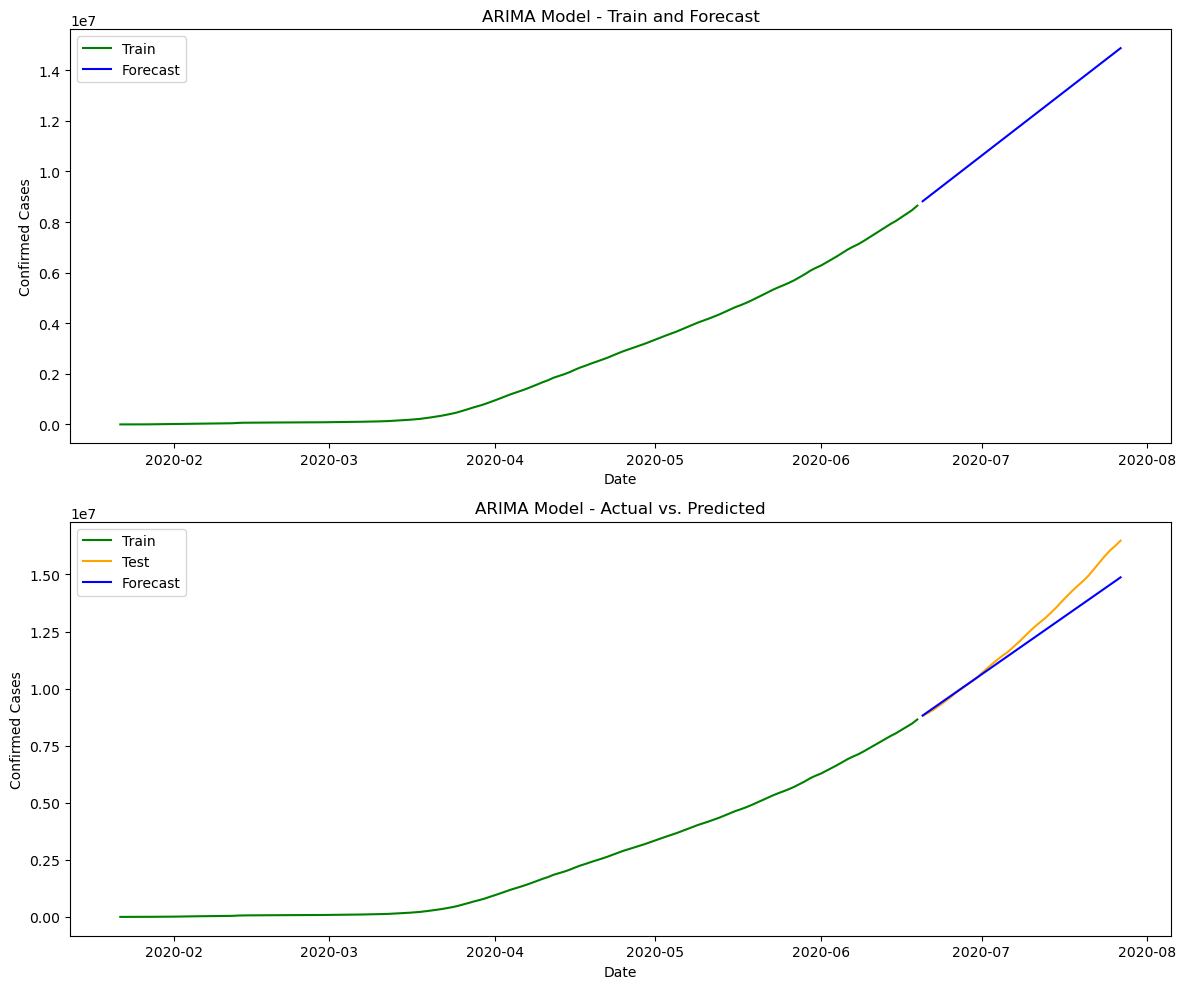

Best ARIMA parameters: (0, 2, 2) with AIC: 3099.7300907436666
Test Mean Absolute Percentage Error (MAPE): 3.52%
Test Mean Absolute Error (MAE): 503861.37949096644
Test Mean Squared Error (MSE): 507581856953.4075
Test Root Mean Squared Error (RMSE): 712447.7924405461


In [119]:
warnings.filterwarnings("ignore", message="Non-invertible starting MA parameters found.")
warnings.filterwarnings("ignore", message="Non-stationary starting autoregressive parameters found.")
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Train-Test Split
train_size = int(len(df_aggregated) * 0.8)
train, test = df_aggregated.iloc[:train_size], df_aggregated.iloc[train_size:]

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)
pdq = list(product(p, d, q))

# Grid Search for ARIMA
best_aic = float("inf")
best_order = None
best_model = None

for param in pdq:
    try:
        model = ARIMA(train['Confirmed'], order=param)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_order = param
            best_model = model_fit
    except:
        continue

# Forecast on test data using the best model
test_pred = best_model.forecast(steps=len(test))

# Calculate metrics
mape_test = mean_absolute_percentage_error(test['Confirmed'], test_pred)
mae_test = mean_absolute_error(test['Confirmed'], test_pred)
mse_test = mean_squared_error(test['Confirmed'], test_pred)
rmse_test = np.sqrt(mse_test)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot forecast only 
axs[0].plot(train.index, train['Confirmed'], label='Train', color='green') 
axs[0].plot(test.index, test_pred, label='Forecast', color='blue') 
axs[0].set_title('ARIMA Model - Train and Forecast') 
axs[0].set_xlabel('Date') 
axs[0].set_ylabel('Confirmed Cases') 
axs[0].legend()

# Plot actual vs. predicted
axs[1].plot(train.index, train['Confirmed'], label='Train', color='green')
axs[1].plot(test.index, test['Confirmed'], label='Test', color='orange')
axs[1].plot(test.index, test_pred, label='Forecast', color='blue')
axs[1].set_title('ARIMA Model - Actual vs. Predicted')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Confirmed Cases')
axs[1].legend()

plt.tight_layout()
plt.show()

# Print metrics
print(f'Best ARIMA parameters: {best_order} with AIC: {best_aic}')
print(f'Test Mean Absolute Percentage Error (MAPE): {mape_test * 100:.2f}%')
print(f'Test Mean Absolute Error (MAE): {mae_test}')
print(f'Test Mean Squared Error (MSE): {mse_test}')
print(f'Test Root Mean Squared Error (RMSE): {rmse_test}')

The initial ARIMA model did not provide satisfactory accuracy in forecasting the confirmed COVID-19 cases. To enhance the model's performance, hyperparameter tuning was conducted. This process involves adjusting the parameters of the ARIMA model—specifically the values of (p, d, q)—to find the optimal combination that minimizes the error metrics and improves forecasting accuracy.

## Hyperparameter Tuning Process
1. **Parameter Grid Search**: A comprehensive grid search was performed over a range of values for p (autoregressive order), d (differencing order), and q (moving average order) to identify the best parameters.
2. **Model Evaluation**: Each combination of parameters was evaluated using the Akaike Information Criterion (AIC) to find the model with the lowest AIC, indicating a better fit.

## Results
- **Best ARIMA Parameters**: (p=0, d=2, q=2)
- **AIC**: 3099.73

## Model Accuracy Metrics (After Tuning)
- **Mean Absolute Percentage Error (MAPE)**: 3.52%
- **Mean Absolute Error (MAE)**: 503,861.38
- **Mean Squared Error (MSE)**: 507,851,856,953.41
- **Root Mean Squared Error (RMSE)**: 712,447.79

The ARIMA model with parameters (0, 2, 2) provided the best fit.
- The model's predictions have a low error rate, indicating strong accuracy.


## Visualization of Actual vs. Predicted Cases

The plots above visualizes the improvement in model accuracy. The green line represents the training data, the orange line represents the actual confirmed cases in the test set, and the blue line represents the ARIMA model's predictions after hyperparameter tuning.



### Recommendations
- Increase monitoring of key metrics during predicted peaks.
- Implement targeted interventions in areas with expected high cases.

## Conclusion

In summary, my analysis and model forecasting provide valuable insights into the COVID-19 trends. Continued data collection and model refinement will improve predictive accuracy and support decision-making processes.
